First we import the data

In [7]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sbs
import matplotlib.pyplot as ply
%matplotlib inline

Then load our dataset

In [21]:
x = "http://bit.ly/w-data"
data_set = pd.read_csv(x)
data_set.tail(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


***Null Empty sets available***

In [26]:
data_set.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [27]:
data_set.nunique()

Hours     23
Scores    23
dtype: int64

# **DATA VISUALIZATION**

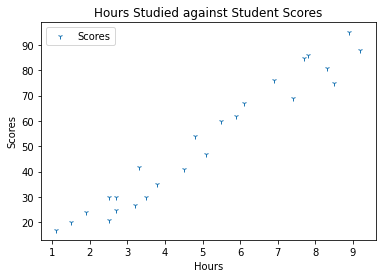

In [42]:
data_set.plot.line(x = "Hours", y = "Scores", style='1')
plt.title("Hours Studied against Student Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

From the graph, it is quite evident that there is a direct relationship between the two variables, thus a linear regression model will be suitable to make a prediction.

***Separation of data into attributes and labels***

In [50]:
x = data_set.drop(columns='Scores', axis='1')
y = data_set['Scores']
print (x)
print ("\n")
print ("Y \n")
print (y)

    Hours
0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8


Y 

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


***Splitting Data & Training the Data***

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("Done Deal!")

Done Deal!


***Visualization of the Linear Regression***

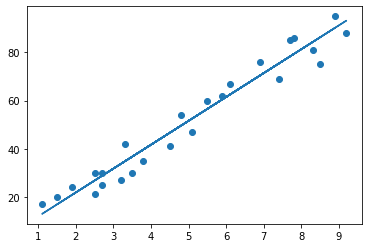

In [59]:
line = regressor.coef_*x+regressor.intercept_
plt.scatter(x,y)
plt.plot(x,line)
plt.show()

***Prediction***[in hours]

In [61]:
print(x_test)
prediction_y = regressor.predict(x_test)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


***Comparison***[Actual against Prediction]

In [62]:
df = pd.DataFrame({'Actual': y_test, 'Prediction' : prediction_y})
df

,Actual,Prediction
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


***Testing our Prediction***

In [66]:
hours = 8
testpred = regressor.predict([[hours]])
print('Hours = {}'.format(hours) )
print('Scores = {}'.format(testpred))


Hours = 8
Scores = [81.30341189]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


***Evaluation [To make a comparison and check the error factor]***

In [70]:
from sklearn import metrics
mae = metrics.mean_absolute_percentage_error(y_test,regressor.predict(x_test))
Percent_mae = mae * 100
print("Our Mean absolute error is {}".format(Percent_mae) + "% thus in all absoluteness, a lesser percentage algorithm ought to be considered." )

Our Mean absolute error is 12.568891617045686% thus in all absoluteness, a lesser percentage algorithm ought to be considered
